

---
## Predictive Modeling for Click-Through Rate Optimization in Digital Advertising
---

In [29]:
from google.colab import files
uploaded = files.upload()


Saving advertising.xlsx to advertising (2).xlsx


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [31]:
df = pd.read_excel('advertising.xlsx')
df.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [32]:
print(df.columns)
print(df.isnull().sum())


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [33]:
df = df.dropna()
print("After dropping missing, rows left:", len(df))

After dropping missing, rows left: 1000


In [34]:
print(df.dtypes)

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object


In [35]:
features = ['Age', 'Area Income', 'Daily Time Spent on Site', 'Daily Internet Usage']
X = df[features]
y = df['Clicked on Ad']

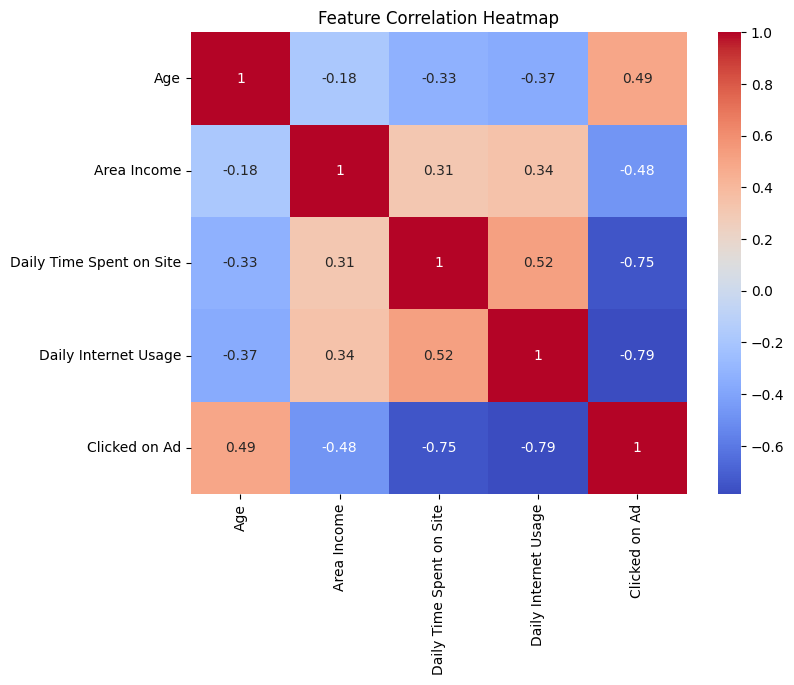

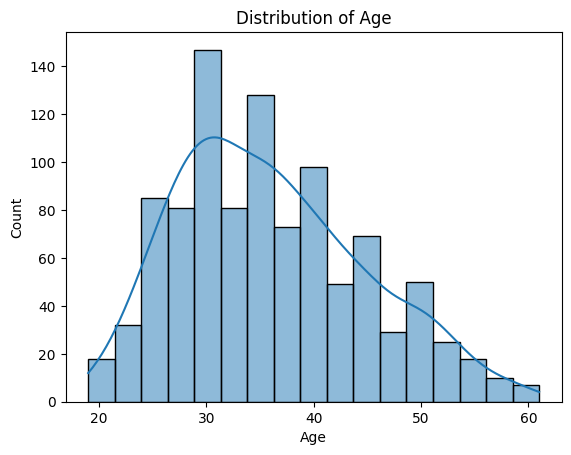

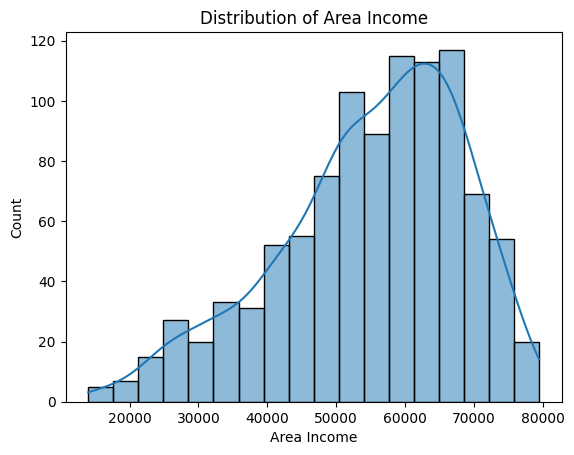

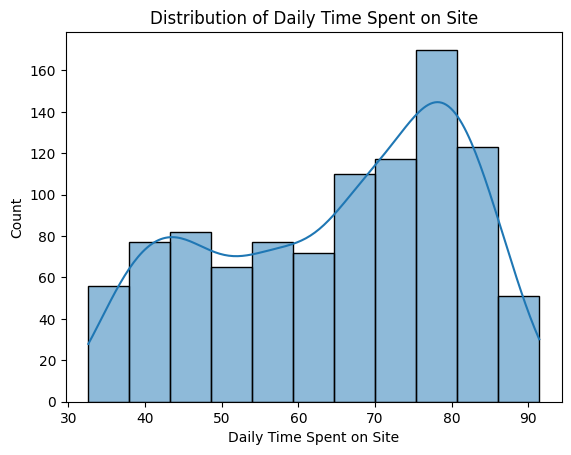

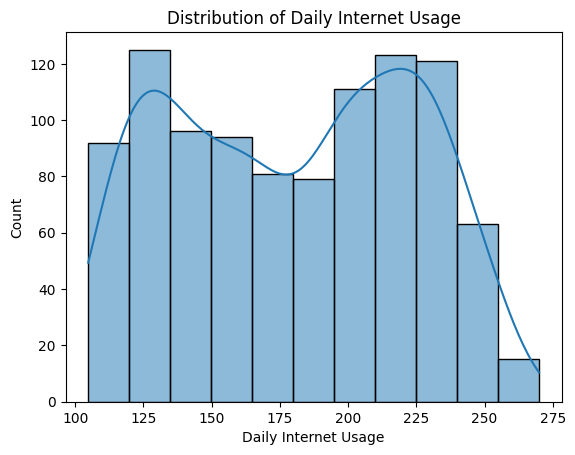

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[features + ['Clicked on Ad']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

for col in features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Traning samples:", len(X_train), "Testing samples:", len(X_test))

Traning samples: 800 Testing samples: 200


In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = model.predict(X_test)

Model Accuracy: 0.95
Precision Score: 0.963302752293578
Recall Score: 0.9459459459459459
Confusion Matrix:
 [[ 85   4]
 [  6 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



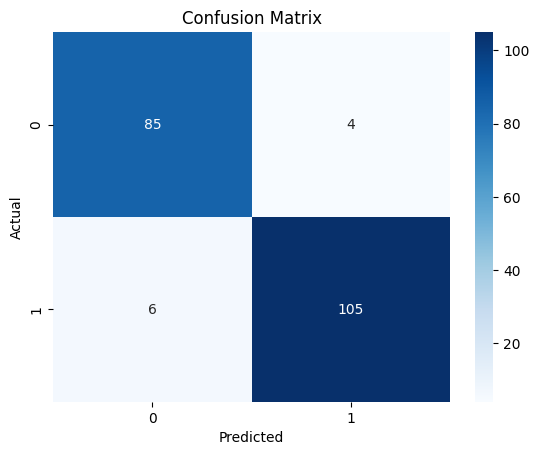

In [40]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 13: Business Interpretation

In this project, we built a machine learning model using logistic regression to predict whether users would click on digital advertisements. Focusing on key features—age, area income, daily time spent on the website, and daily internet usage—we achieved a test accuracy of 95%. This demonstrates that these factors are highly effective for classifying user behavior regarding online ads.

The model works by learning patterns in historical data and then accurately predicting new users’ ad interaction. This is significant for ConnectSphere Digital, as it enables precise targeting of ads toward users who are statistically most likely to click. As a result, advertising budgets can be used more efficiently, cutting down on wasted spend.

In the real world, such predictive models help digital marketing agencies improve campaign performance, raise click-through rates, and generate higher returns on investment for clients. By continuing to update the model with new user data and exploring additional influencing factors, this approach can remain effective even as market trends and user behaviors change.
